# Titanic Survivors
___

## Data
The dataset contains data for the passengers who boarded the Titanic. The objective is to predict whether a passenger will survive or not survive the titanic tragedy using classification.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from scipy.stats import pearsonr
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve

In [2]:
titanic = pd.read_csv('data/train.csv', )
print(titanic.shape)
print(list(titanic.columns))

(891, 12)
['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


The datasest includes 891 records/passengers and 12 fields.

In [3]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


---

## Input variables
1. PassengerId (numeric): 
    * Count of passengers, incremental. Unique for each passenger, can be used as index.
2. Pclass (categorical):
    * Ticket class, a proxy for socio-economic status (SES):
        * 1 = 1st = Upper
        * 2 = 2nd = Middle
        * 3 = 3rd = Lower
3. Name:
    * Name of passenger, unique per passenger.
4. Sex (categorical):
    * male
    * female
5. Age (numeric)
6. SibSp (numeric):
    * Number of siblings/spouses, family relations aboard the Titanic.
        * Sibling = brother, sister, stepbrother, stepsister.
        * Spouse = husband, wife
            * Ignore = mistresses and fiances
7. Parch (numeric):
    * Number of parents/children, family relations aboard the Titanic.
        * Parent = mother, father
        * Child = daughter, son, stepdaughter, stepson
            * Children travelling with only a nanny = 0 for them.
8. Ticket:
    * Ticket number.
9. Fare (numeric):
    * Passenger fare.
10. Cabin:
    * Cabin number.
11. Embarked (categorical):
    * Port of Embarkation:
        * C = Cherbourg
        * Q = Queenstown
        * S = Southampton
        * nan = Unknown

## Predict variable (desired target)
* Survived (binary):
    * Whether passenger survived or not:
        * Yes = 1
        * No = 0

---

## Cleaning data

In [4]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
titanic['Cabin'].fillna('unknown', inplace=True)
print('Replaced all missing values for cabin with "unknown" \n')
print(titanic.Cabin.unique())

Replaced all missing values for cabin with "unknown" 

['unknown' 'C85' 'C123' 'E46' 'G6' 'C103' 'D56' 'A6' 'C23 C25 C27' 'B78'
 'D33' 'B30' 'C52' 'B28' 'C83' 'F33' 'F G73' 'E31' 'A5' 'D10 D12' 'D26'
 'C110' 'B58 B60' 'E101' 'F E69' 'D47' 'B86' 'F2' 'C2' 'E33' 'B19' 'A7'
 'C49' 'F4' 'A32' 'B4' 'B80' 'A31' 'D36' 'D15' 'C93' 'C78' 'D35' 'C87'
 'B77' 'E67' 'B94' 'C125' 'C99' 'C118' 'D7' 'A19' 'B49' 'D' 'C22 C26'
 'C106' 'C65' 'E36' 'C54' 'B57 B59 B63 B66' 'C7' 'E34' 'C32' 'B18' 'C124'
 'C91' 'E40' 'T' 'C128' 'D37' 'B35' 'E50' 'C82' 'B96 B98' 'E10' 'E44'
 'A34' 'C104' 'C111' 'C92' 'E38' 'D21' 'E12' 'E63' 'A14' 'B37' 'C30' 'D20'
 'B79' 'E25' 'D46' 'B73' 'C95' 'B38' 'B39' 'B22' 'C86' 'C70' 'A16' 'C101'
 'C68' 'A10' 'E68' 'B41' 'A20' 'D19' 'D50' 'D9' 'A23' 'B50' 'A26' 'D48'
 'E58' 'C126' 'B71' 'B51 B53 B55' 'D49' 'B5' 'B20' 'F G63' 'C62 C64' 'E24'
 'C90' 'C45' 'E8' 'B101' 'D45' 'C46' 'D30' 'E121' 'D11' 'E77' 'F38' 'B3'
 'D6' 'B82 B84' 'D17' 'A36' 'B102' 'B69' 'E49' 'C47' 'D28' 'E17' 'A24'
 'C

In [6]:
titanic['Embarked'].fillna('unknown', inplace=True)
print('Replaced all missing values for embarked with "unknown" \n')
print(titanic.Embarked.unique())

Replaced all missing values for embarked with "unknown" 

['S' 'C' 'Q' 'unknown']


In [7]:
mean_age = titanic['Age'].mean()
titanic['Age'].fillna(mean_age, inplace=True)
print(f'Imputed all missing values for age with the mean average for age: {mean_age}')

Imputed all missing values for age with the mean average for age: 29.69911764705882


In [8]:
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [9]:
titanic.set_index('PassengerId', inplace=True)

In [10]:
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,unknown,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,unknown,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,unknown,S


Made PassengerId as index.

---

## Data Exploration

In [11]:
titanic['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [12]:
sns.set()

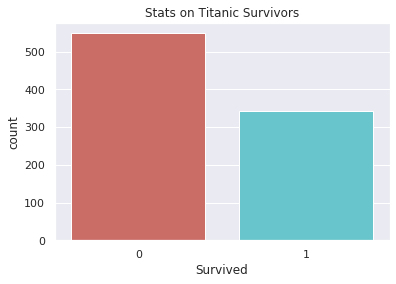

In [13]:
sns.countplot(x='Survived', data= titanic, palette= 'hls')
plt.title('Stats on Titanic Survivors')
plt.show()

In [14]:
surv_0 = len(titanic[titanic.Survived == 0])
surv_1 = len(titanic[titanic.Survived == 1])
print(f'Percentage of passengers who survived: %.2f' % (surv_1 / (surv_0 + surv_1) * 100))
print(f'Percentage of passengers who did not survived: %.2f' % (surv_0 / (surv_0 + surv_1) * 100))

Percentage of passengers who survived: 38.38
Percentage of passengers who did not survived: 61.62


Classes are not balanced, the ratio of non-survivors to survivors is 62:38

In [15]:
titanic.groupby('Survived').mean()

,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,
0,2.531876,30.415100,0.553734,0.329690,22.117887
1,1.950292,28.549778,0.473684,0.464912,48.395408


### Observations:
* The average ticket class (Pclass) for non-survivors is between the middle and upper class and for the survivors is between lower and middle class, closer to middle class.
* Average age of surviving passengers is lower than those who did not survive.
* On average those who paid more on fare price survived.

### Heatmap

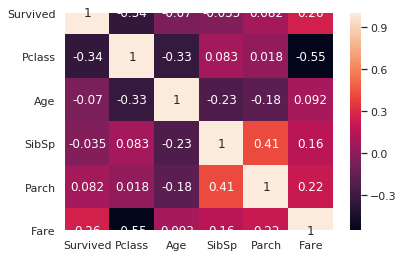

In [16]:
sns.heatmap(titanic.corr(), annot=True)
plt.show()

Parch and fare both have a positive correlation with survived:
* Parch = 0.08
* Fare = 0.26

---

## Dummy Variables
Creating dummy variables for all catergorical except for those that are already binary.

In [52]:
titanic_final = titanic[['Parch', 'Fare', 'Survived']]
for col in ['Sex', 'Embarked', 'Pclass']:
    titanic_dummy = pd.get_dummies(titanic[col], prefix=col)
    titanic_final = titanic_final.merge(titanic_dummy, on='PassengerId')
print('Created dummy variables for Sex and Embarked columns, stored the results to titanic_final along with the columns Survived, Fare and Parch')

Created dummy variables for Sex and Embarked columns, stored the results to titanic_final along with the columns Survived, Fare and Parch


In [49]:
titanic_final.head()

,Parch,Fare,Survived,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Embarked_unknown,Pclass_1,Pclass_2,Pclass_3
PassengerId,,,,,,,,,,,,
1,0,7.2500,0,0,1,0,0,1,0,0,0,1
2,0,71.2833,1,1,0,1,0,0,0,1,0,0
3,0,7.9250,1,1,0,0,0,1,0,0,0,1
4,0,53.1000,1,1,0,0,0,1,0,1,0,0
5,0,8.0500,0,0,1,0,0,1,0,0,0,1


### Heatmap

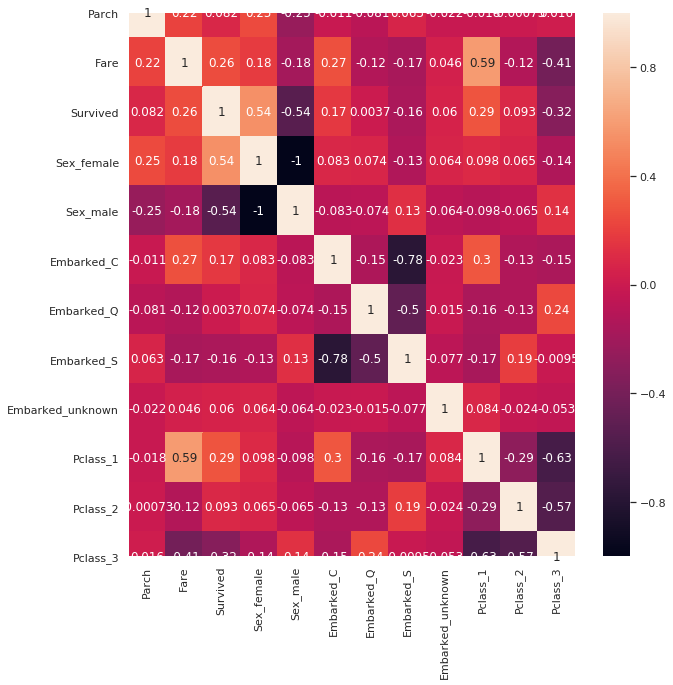

In [50]:
ax = plt.subplots(figsize=(10, 10))
sns.heatmap(titanic_final.corr(), annot=True)

Features that have a positive correlation with Survived:
* Parch = 0.082
* Fare = 0.26
* Sex_female = 0.54
* Embarked_C = 0.17
* Embarked_Q = 0.0037
* Embarked_unknown = 0.06
* Pclass_1 = 0.29
* Pclass_2 = 0.093

With Embarked_Q having the lowest positive correlation of 0.37% and Sex_female with the highest correlation of 54%.

In [53]:
titanic_final.drop(['Sex_male', 'Embarked_S', 'Pclass_3'], axis=1, inplace=True)
titanic_final.head()

,Parch,Fare,Survived,Sex_female,Embarked_C,Embarked_Q,Embarked_unknown,Pclass_1,Pclass_2
PassengerId,,,,,,,,,
1,0,7.2500,0,0,0,0,0,0,0
2,0,71.2833,1,1,1,0,0,1,0
3,0,7.9250,1,1,0,0,0,0,0
4,0,53.1000,1,1,0,0,0,1,0
5,0,8.0500,0,0,0,0,0,0,0


### P-Value
Checking p-values for positive correlated features.

In [54]:
for col in titanic_final.columns:
    if col != 'Survived':
        pval = pearsonr(titanic_final[col],titanic_final['Survived'])
        if pval[1] < 0.05:
            print(f'{col} pearsonr: {pval} is significant')
        else:
            print(f'{col} pearsonr: {pval} is not significant')
            titanic_final.drop(col, axis=1, inplace=True)

Parch pearsonr: (0.08162940708348349, 0.014799245374712763) is significant
Fare pearsonr: (0.25730652238496243, 6.120189341917992e-15) is significant
Sex_female pearsonr: (0.543351380657756, 1.406066130877916e-69) is significant
Embarked_C pearsonr: (0.16824043121823323, 4.397151329802443e-07) is significant
Embarked_Q pearsonr: (0.003650382683972031, 0.9133532352424734) is not significant
Embarked_unknown pearsonr: (0.06009484737835664, 0.07298716597942738) is not significant
Pclass_1 pearsonr: (0.2859037677837424, 3.1905822417500118e-18) is significant
Pclass_2 pearsonr: (0.09334857241192926, 0.005293655281557418) is significant


In [55]:
print('Dropped non-significant columns and the final dataframe looks like:')
titanic_final.head()

Dropped non-significant columns and the final dataframe looks like:


,Parch,Fare,Survived,Sex_female,Embarked_C,Pclass_1,Pclass_2
PassengerId,,,,,,,
1,0,7.2500,0,0,0,0,0
2,0,71.2833,1,1,1,1,0
3,0,7.9250,1,1,0,0,0
4,0,53.1000,1,1,0,1,0
5,0,8.0500,0,0,0,0,0


---

## Logistic Regression Model Fitting
Separating the final dataframe titanic_final into two variables, X (predictor) and y (target).

In [56]:
X = titanic_final[[x for x in titanic_final.columns if x != 'Survived']]
y = titanic_final['Survived']

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=7)

Splitted the data into a train set (70%) and test set (30%) with the random state of 7.

Instantiate the Logistic Regression model and fitting the data train set data to the model:

In [58]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

/home/vector/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

Using test set to predict and calculate the accuracy of the model.

In [59]:
y_pred = logreg.predict(X_test)
print(f'Logistic Regression model accuracy = {accuracy_score(y_test, y_pred)}')

Logistic Regression model accuracy = 0.746268656716418


### Classification Report

In [60]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.85      0.80       156
           1       0.74      0.61      0.67       112

    accuracy                           0.75       268
   macro avg       0.74      0.73      0.73       268
weighted avg       0.75      0.75      0.74       268



#### Precision
Calculates how correctly the model predicts the class, fraction of predicted survivors that are actually survivors and the same for non-survivors. Of all non-survivors predicted the model accurately predicted 75% to be non-survivors and 25% to be survivors that are actually non-survivors. Of all survivors predicted the model accurately predicted 74% to be survivors and 26% to be non-survivors that are actually survivors.
#### Recall
##### Sensitivity
Fraction of positives that were predicted correctly, percentage of survivors predicted accurately is 61%
##### Specificity
Fraction of negatives that were predicted correctly, percentage of non-survivors predicted accurately is 85%

### Confusion Matrix

In [61]:
print(confusion_matrix(y_test, y_pred))

[[132  24]
 [ 44  68]]


From the confusion matrix we see that the model made 132 + 68 correct predictions which total to 200 and 44 + 24 incorrect predictions which total to 68.

---

## ROC Curve

Predicted results

In [72]:
logreg_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, threshold = roc_curve(y_test, y_pred)

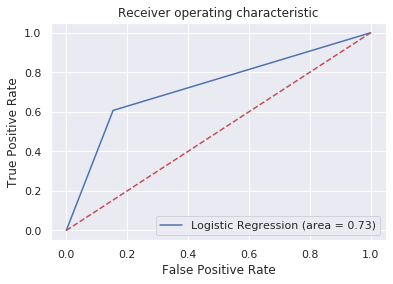

In [73]:
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logreg_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

Prediction probability results

In [74]:
logreg_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, threshold = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])

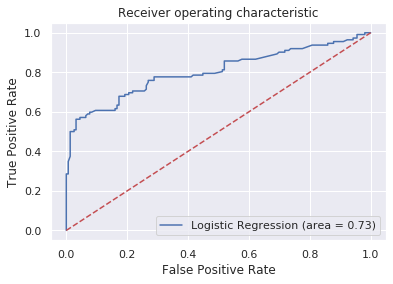

In [75]:
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logreg_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()